##### Домашнее задание к лекции «Корреляция и корреляционный анализ»
###### 1 Задание. Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

###### 2 Задание. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

###### Решенние по  заданиям.

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('water.csv')

class correlation_dz:
    
    methods = ['pearson', 'spearman']

    width = 10
    height = 6
    
    def __init__(self, df_):
        self.df = df_
        
        #Определение значений функции (смертность) и значений переменных (жесткость воды)
        self.X = self.df[['hardness']]
        self.Y = self.df['mortality']

        #Разделение выборки на тетовую и тренировочную
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size=0.3)
        
        #Создание модели линейной регресси
        self.model = LinearRegression()
        #Обучение модели
        self.model.fit(self.X_train, self.Y_train) 
        #Прогнозное значение
        self.Y_predict = self.model.predict(self.X)
        
        #создаем полотно для отображения графика
        self.figure2, self.axes2 = plt.subplots()
        
    def graph1(self):
    # Построить точечный график для наглядного отображения зависимости значений от порядкового номера строки (населенный пункт)
        #создаем полотно для отображения графика
        self.figure1, self.axes1 = plt.subplots()
        
        # График
        self.axes1.plot(self.df.iloc[:,0], self.df.mortality/10, linewidth = 1, label = f'Смертность (x10 чел.)')
        self.axes1.plot(self.df.iloc[:,0], self.df.hardness,     linewidth = 1, label = f'Жесткость воды')
        
        self.axes1.scatter(self.df.iloc[:,0], self.df.mortality/10, linewidth = 3)
        self.axes1.scatter(self.df.iloc[:,0], self.df.hardness,     linewidth = 3)

        #форомируем разметку на осях
        #основные линии оси-абсцис  
        self.axes1.xaxis.set_major_locator(ticker.MultipleLocator(2))
        #основные линии оси-ординат  
        self.axes1.yaxis.set_major_locator(ticker.MultipleLocator(20))

        self.axes1.legend(fontsize = 8, ncol = 2, facecolor = 'oldlace', 
                          edgecolor = 'r', title = 'Легенда', title_fontsize = '8', loc="best")

        #Подписываем график
        plt.title('Смертность и жесткость воды ')
        #Подписываем оси
        plt.xlabel('Порядковый номер населенного пункта')
        plt.ylabel('Показатель') 


        self.figure1.set_figwidth(self.width)
        self.figure1.set_figheight(self.height)
        self.axes1.grid()
    
    def graph2(self, X, Y, color_, label_ = ''):
 
    # Построить графики
        self.axes2.scatter(X, Y, c = color_, label = label_)      
        self.figure2.set_figwidth(self.width)
        self.figure2.set_figheight(self.height)
        self.axes2.grid()
        self.axes2.legend(loc="best")
        
    
    def  get_corr_koeff(self):
    # *Рассчитать коэффициенты корреляции Пирсона и Спирмена  
        dict_ = {item:(self.df[['mortality','hardness']].corr(item).iloc[0,1]) for item in self.methods}
        return f'Коэффициенты корреляции: {dict_}'
    
    def get_line(self):
    # Построить модель линейной регрессии
        return f'Уравнение прямой: {str(self.model.coef_ [0])} • X + {self.model.intercept_}'

    def get_corr_determination(self):
    # Рассчитать коэффициент детерминации
        return f'Коэффициент детерминации: {self.model.score(self.X_test, self.Y_test)}'

#Функция для демонстрации решения
def decisions(df_, title_):
    obj_df = correlation_dz(df_)

    obj_df.graph1()
    obj_df.graph2(obj_df.X, obj_df.Y, 'b', 'Исходные значения (смертность, жесткость воды)')
    obj_df.graph2(obj_df.X, obj_df.Y_predict, 'r', 'Линия регрессии')
    obj_df.graph2(obj_df.X, (obj_df.Y_predict - obj_df.Y), 'g', 'График остатков')
    
    print(f'************* {title_} *************')
    print(obj_df.get_corr_koeff())
    print(obj_df.get_line())
    print(obj_df.get_corr_determination())
    

************* Полный набор данных *************
Коэффициенты корреляции: {'pearson': -0.6548486232042464, 'spearman': -0.6316646189166502}
Уравнение прямой: -3.1506740043872368 • X + 1659.7206459106667
Коэффициент детерминации: 0.5144057753030912


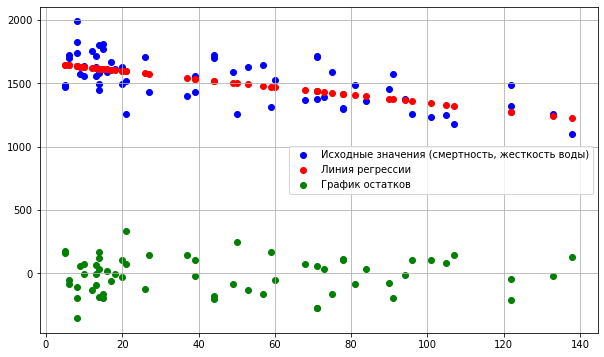

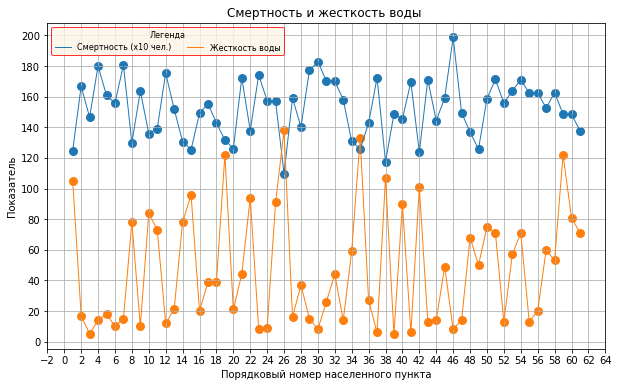

In [3]:
decisions(df, 'Полный набор данных')

************* Юхные города *************
Коэффициенты корреляции: {'pearson': -0.6021532715484159, 'spearman': -0.5957229185013566}
Уравнение прямой: -2.5365347286690847 • X + 1545.865246950047
Коэффициент детерминации: -0.12582300968062143


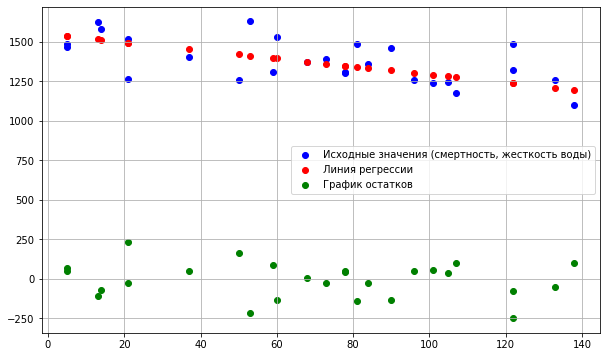

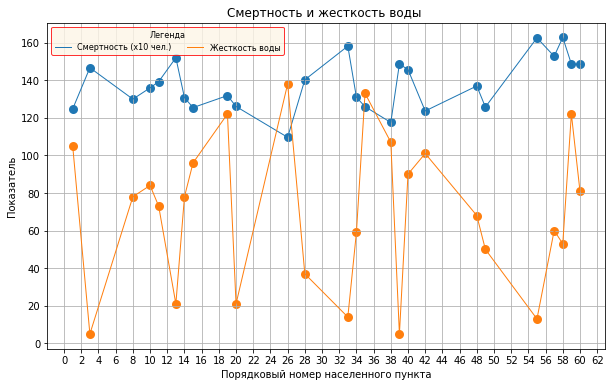

In [4]:
decisions(df[ df['location'] == 'South' ], 'Юхные города')

************* Северные города *************
Коэффициенты корреляции: {'pearson': -0.36859783832887183, 'spearman': -0.4042078956511175}
Уравнение прямой: -1.895404753004682 • X + 1687.774651486449
Коэффициент детерминации: 0.0663476357317605


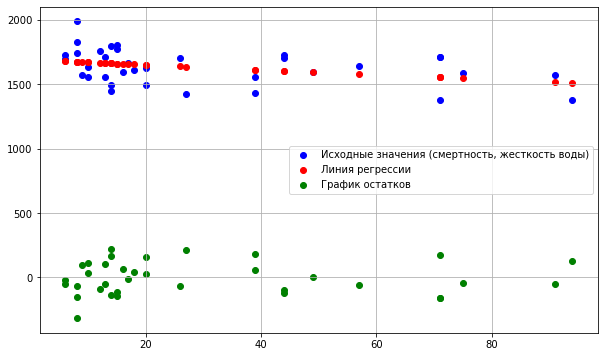

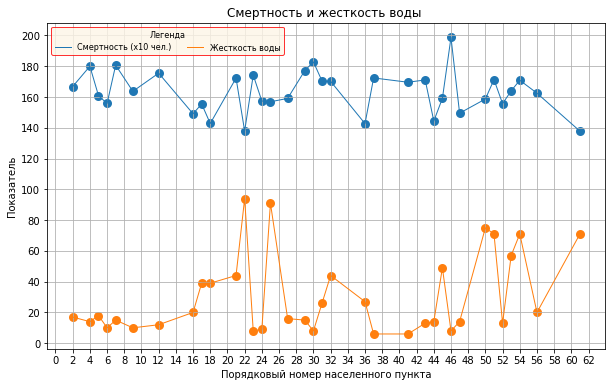

In [5]:
decisions(df[ df['location'] == 'North' ], 'Северные города')

*Наблюдается выраженная обратная зависимость смертности от жесткости воды в южный регионах, для сервера наблюдаются исключения.*